In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import pandas as pd
import h5py
import time

import matplotlib.pyplot as plt
import matplotlib as mpl

from tomo_encoders.img_stats import Parallelize, calc_jac_acc, pore_analysis
from tomo_encoders.data_sampling import *
from tomo_encoders.porosity_encoders import custom_objects_dict, build_CAE_3D
from tomo_encoders.latent_vis import *
from tomo_encoders.feature_maps_vis import *


from tensorflow.keras.models import load_model
import pickle

figw = 8
import seaborn as sns
sns.set(font_scale = 1)
sns.set_style("whitegrid", {'axes.grid' : False})

#just same as train_CAE

In [2]:
batch_size = 24
patch_size = (64,64,64)
add_noise = 0.2
downres = 2
data_path = "/data02/MyArchive/aisteer_3Dencoders/data_TomoTwin/"
model_path = "/data02/MyArchive/aisteer_3Dencoders/models/"

In [3]:
csv_path = os.path.join(data_path, "datalist_train.csv")

Xs, Ys, plot_labels = get_data_from_flist(csv_path, \
                                          normalize = True, \
                                          data_tags = ("recon", "gt_labels"),\
                                          group_tags = ["tomo"], \
                                          downres = downres)

In [4]:
dg = data_generator_4D_denoiser(Xs, patch_size, batch_size, add_noise)

x, y = next(dg)
print("Shape of x: %s"%str(x.shape))
print("Shape of y: %s"%str(y.shape))

Shape of x: (24, 64, 64, 64, 1)
Shape of y: (24, 64, 64, 64, 1)


In [5]:
dg = data_generator_4D(Xs, patch_size, batch_size, add_noise)

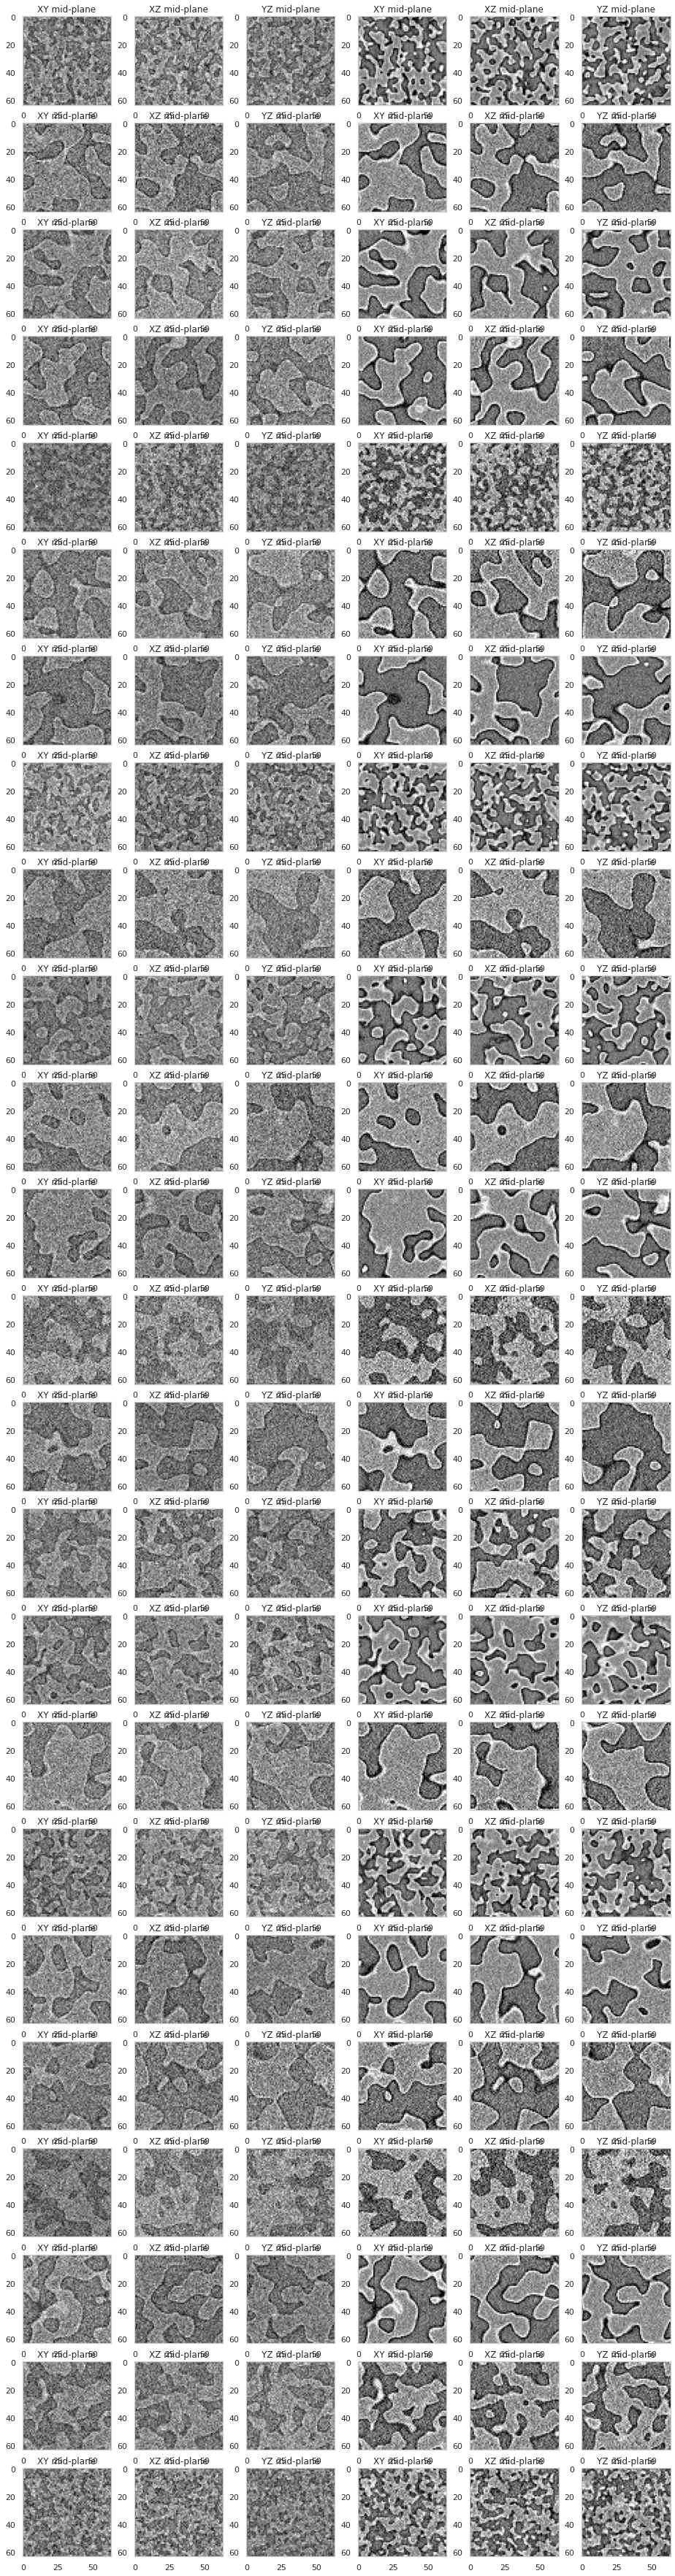

In [6]:
fig, ax = plt.subplots(batch_size,6, figsize = (figw*2,batch_size*figw/3))
for ib in range(batch_size):
    view_midplanes(vol = x[ib,:,:,:,0], ax = ax[ib,:3])
    view_midplanes(vol = y[ib,:,:,:,0], ax = ax[ib,3:])    